In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=";")

# Create binary target
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)  # 1 for high quality, 0 for low quality

# Split the data into features and target
X = data.drop("quality", axis=1)
y = data["quality"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Train a Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [4]:
# Get text representation of the tree
tree_rules = export_text(tree_model, feature_names=list(X.columns))
print(tree_rules)


|--- alcohol <= 10.53
|   |--- sulphates <= 0.57
|   |   |--- alcohol <= 9.75
|   |   |   |--- class: 0
|   |   |--- alcohol >  9.75
|   |   |   |--- class: 0
|   |--- sulphates >  0.57
|   |   |--- total sulfur dioxide <= 81.50
|   |   |   |--- class: 1
|   |   |--- total sulfur dioxide >  81.50
|   |   |   |--- class: 0
|--- alcohol >  10.53
|   |--- sulphates <= 0.58
|   |   |--- alcohol <= 11.45
|   |   |   |--- class: 0
|   |   |--- alcohol >  11.45
|   |   |   |--- class: 1
|   |--- sulphates >  0.58
|   |   |--- total sulfur dioxide <= 61.50
|   |   |   |--- class: 1
|   |   |--- total sulfur dioxide >  61.50
|   |   |   |--- class: 1



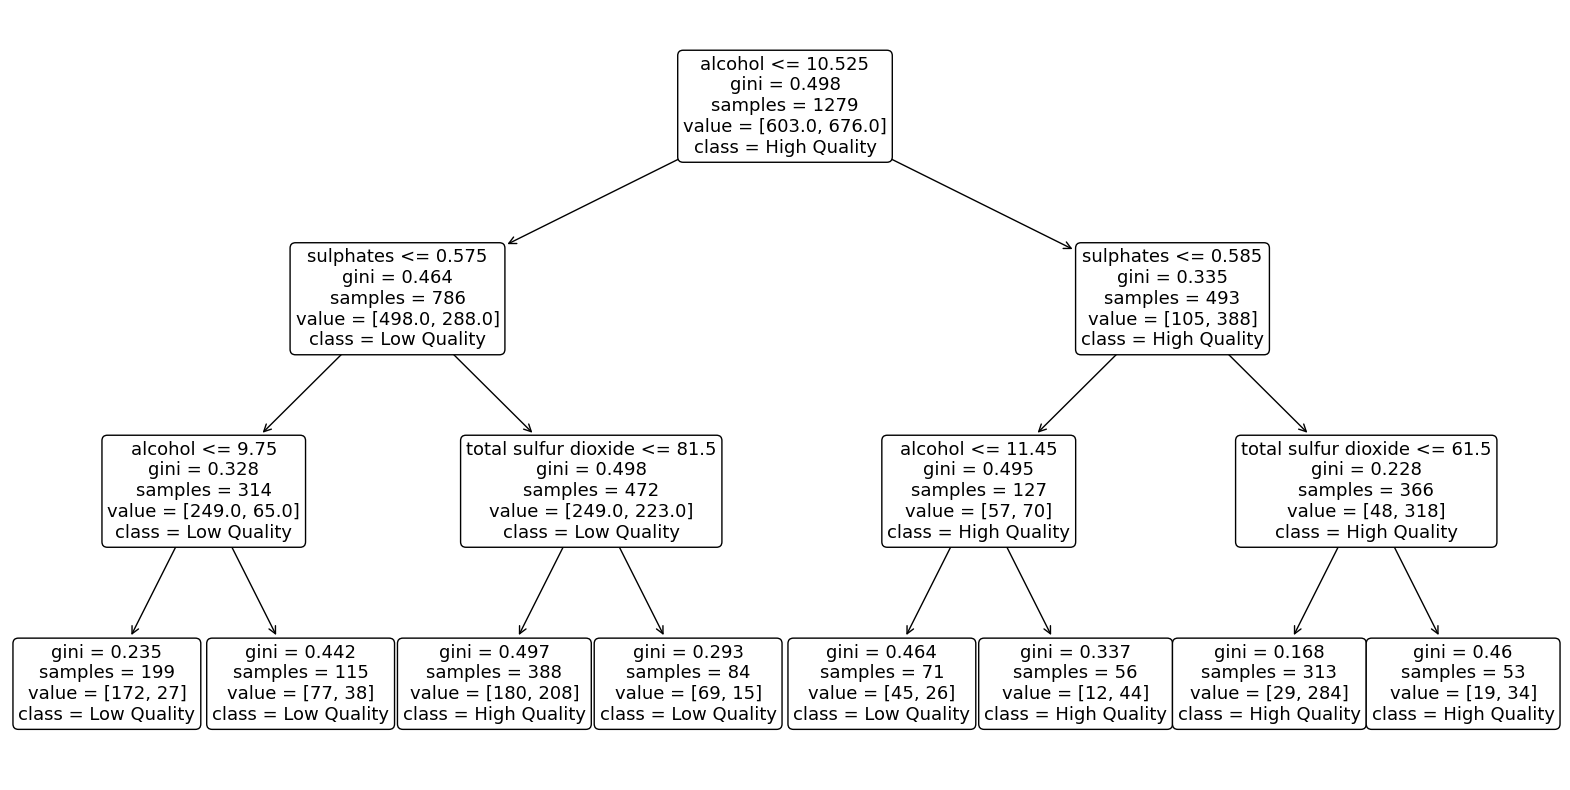

In [9]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Low Quality', 'High Quality'], rounded=True,fontsize=13)
plt.show()